In [4]:
import numpy as np
import matplotlib.pyplot  as plt

In [49]:
def weight_init(act_func_key, calculate_weight_key):
    # assume some unit gaussian 10-D input data
    D = np.random.randn (1000, 500)
    hidden_layer_sizes = [500]*10
    nonlinearities = [act_func_key]*len(hidden_layer_sizes)

    print('Hidden Layer: %f and non-linearity: %f', hidden_layer_sizes, nonlinearities)
    act = {'relu' :lambda x: np.maximum(0,x), 'tanh': lambda x: np.tanh(x)}
    ca_weight= {'sw': lambda fan_in,fan_out: np.random.randn(fan_in, fan_out) * 0.01, 
         'xa': lambda fan_in,fan_out: np.random.randn(fan_in, fan_out) /np.sqrt(fan_in),
        'he': lambda fan_in,fan_out: np.random.randn(fan_in, fan_out) /np.sqrt(fan_in/2)
         }
    Hs={}

    for i in range(len(hidden_layer_sizes)):
        X =D if i == 0  else Hs[i-1] # input at this layer

        fan_in = X.shape[1]
        fan_out = hidden_layer_sizes[i]
        W = ca_weight[calculate_weight_key](fan_in, fan_out) # layer initialization with small weight
        # W= np.random.randn(fan_in, fan_out)/np.sqrt(fan_in) # layer initialization with Xavier initialization

        H = np.dot(X, W) # matrix multiply
        H = act[nonlinearities[0]](H) # nonlinearity
        Hs[i] = H # cache result on this layer

    # look at distributions at each layer
    print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
    layer_means = [np.mean(H) for i,H in Hs.items()]
    layer_stds = [np.std(H) for i,H in Hs.items()]
    for i,H in Hs.items():
        print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

    # plot the means and standard deviations
    plt.figure()
    plt.subplot (121)
    plt.plot(Hs.keys(), layer_means, 'ob-')
    plt.title('layer mean')

    plt.subplot(122)

    plt.plot(Hs.keys(), layer_stds, 'or-')
    plt.title('layer std')

    # # plot the raw distributions
    plt.figure(figsize=(15,8))
    for i,H in Hs.items():
        plt.subplot(1, len(Hs),i+1)
        plt.hist(H.ravel(), 30, range=(-1,1))



Hidden Layer: %f and non-linearity: %f [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] ['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu']
input layer had mean -0.003562 and std 1.000364
hidden layer 1 had mean 0.088884 and std 0.130278
hidden layer 2 had mean 0.014201 and std 0.020672
hidden layer 3 had mean 0.002243 and std 0.003286
hidden layer 4 had mean 0.000336 and std 0.000497
hidden layer 5 had mean 0.000050 and std 0.000076
hidden layer 6 had mean 0.000008 and std 0.000012
hidden layer 7 had mean 0.000001 and std 0.000002
hidden layer 8 had mean 0.000000 and std 0.000000
hidden layer 9 had mean 0.000000 and std 0.000000
hidden layer 10 had mean 0.000000 and std 0.000000


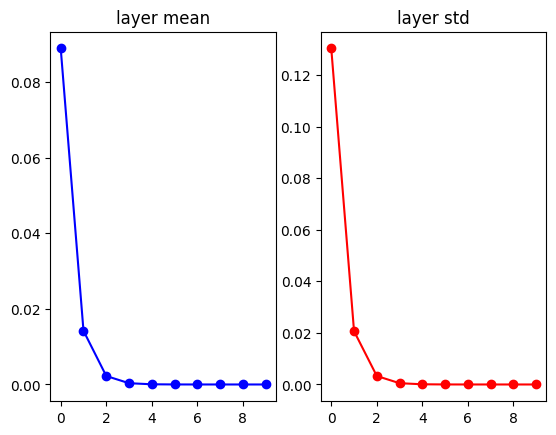

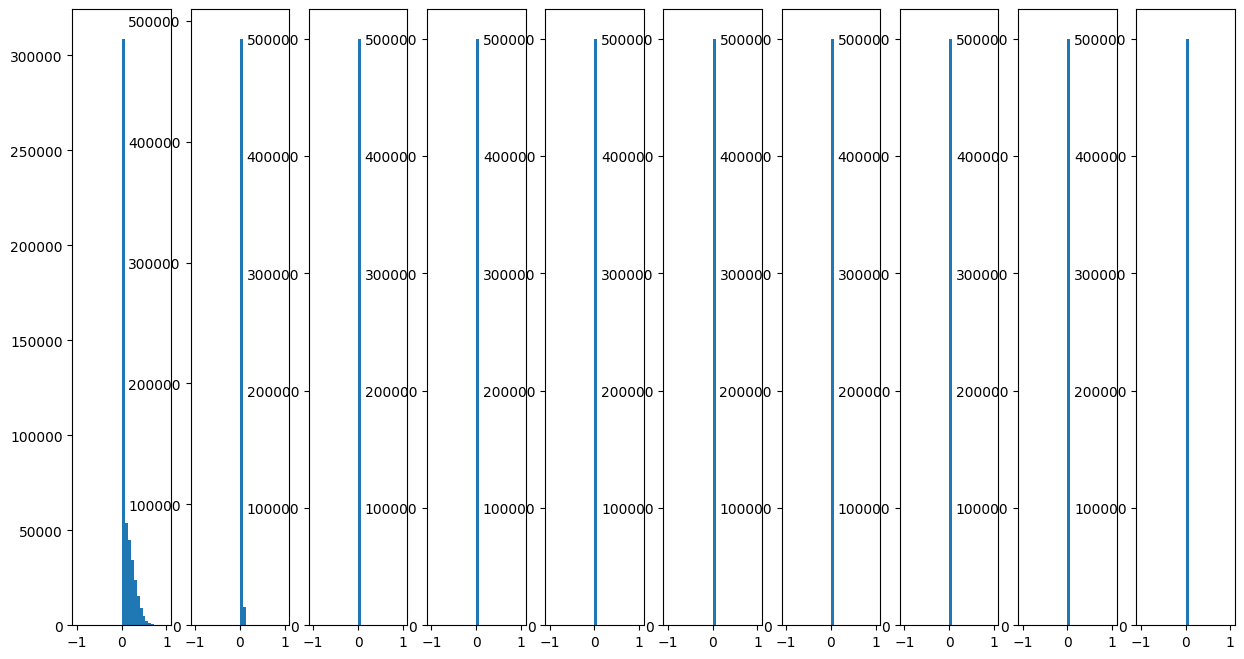

In [51]:
# for small value
weight_init('relu', 'sw')

Hidden Layer: %f and non-linearity: %f [500, 500, 500, 500, 500, 500, 500, 500, 500, 500] ['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu']
input layer had mean 0.000003 and std 1.000258
hidden layer 1 had mean 0.565142 and std 0.827979
hidden layer 2 had mean 0.557535 and std 0.826089
hidden layer 3 had mean 0.562425 and std 0.831361
hidden layer 4 had mean 0.551938 and std 0.808098
hidden layer 5 had mean 0.571118 and std 0.818814
hidden layer 6 had mean 0.591547 and std 0.843321
hidden layer 7 had mean 0.597263 and std 0.862600
hidden layer 8 had mean 0.572588 and std 0.886640
hidden layer 9 had mean 0.588440 and std 0.902258
hidden layer 10 had mean 0.603843 and std 0.895043


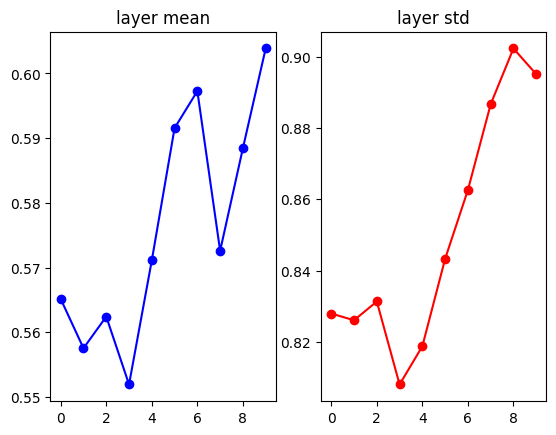

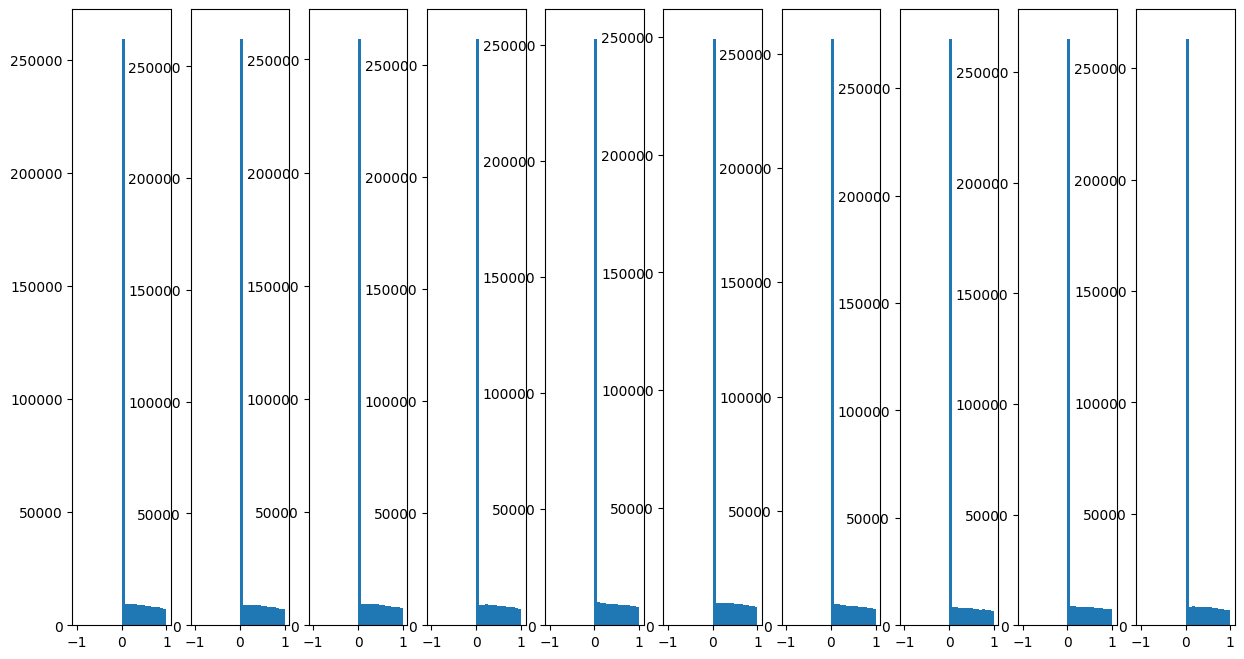

In [53]:
# for small value
weight_init('relu', 'he')